<a href="https://colab.research.google.com/github/DAHYUN-HAN/deeplearning/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


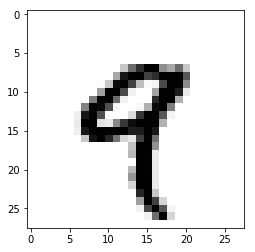

In [121]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

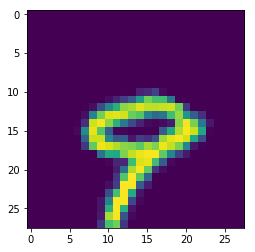

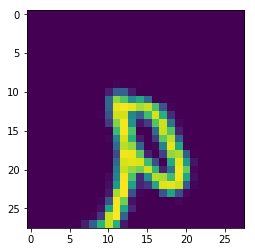

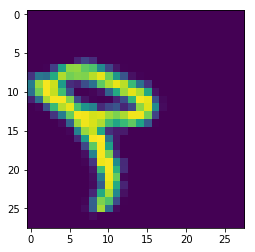

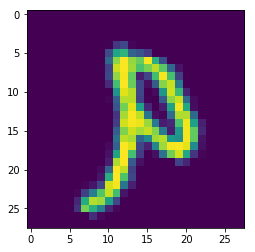

In [122]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

img_path = train_images[4]

x = image.img_to_array(img_path)
x = x.reshape((1,) + x.shape)


i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32')

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32')

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [124]:

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)              

In [0]:
# 데이터 제너레이터

from keras.preprocessing.image import ImageDataGenerator 
    
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_datagen.fit(train_images)

In [129]:
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=128),
                    steps_per_epoch=250, epochs=10)

model.save('mnist_ver1.h5')

Epoch 1/10
250/250 [==============================] - 13s 53ms/step - loss: 1.4923 - acc: 0.4863
Epoch 2/10
250/250 [==============================] - 12s 47ms/step - loss: 0.7660 - acc: 0.7533
Epoch 3/10
250/250 [==============================] - 12s 47ms/step - loss: 0.5154 - acc: 0.8393
Epoch 4/10
250/250 [==============================] - 12s 47ms/step - loss: 0.3995 - acc: 0.8714
Epoch 5/10
250/250 [==============================] - 11s 46ms/step - loss: 0.3293 - acc: 0.8977
Epoch 6/10
250/250 [==============================] - 11s 46ms/step - loss: 0.2861 - acc: 0.9107
Epoch 7/10
250/250 [==============================] - 11s 45ms/step - loss: 0.2522 - acc: 0.9217
Epoch 8/10
250/250 [==============================] - 11s 46ms/step - loss: 0.2263 - acc: 0.9299
Epoch 9/10
250/250 [==============================] - 11s 45ms/step - loss: 0.2044 - acc: 0.9352
Epoch 10/10
250/250 [==============================] - 11s 45ms/step - loss: 0.1892 - acc: 0.9412


In [126]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

In [130]:
test_loss, test_acc = model.evaluate(test_datagen.flow(test_images, test_labels))
test_acc

313/313 [==============================] - 1s 4ms/step


0.9831